<a href="https://colab.research.google.com/github/ivalozkaMIIGAiK/network/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B8%CC%86%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B8%CC%86_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

In [3]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import gradio as gr
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#### 1.1. Загружаем исходные данные:

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### 1.2. Проектируем архитектуру для этой задачи

In [6]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Архитектура модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #первый слой
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'), #второй слой
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'), #третий слой
    Dense(1)  # Выходной слой без активации для регрессии
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [7]:
# Компиляция модели
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

#### 1.4. Обучаем модель ИНС

In [8]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150,
    batch_size=16,
    verbose=1
)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 524.8616 - mae: 21.1592 - val_loss: 506.3922 - val_mae: 20.9633
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 501.7910 - mae: 20.8058 - val_loss: 472.0587 - val_mae: 20.2995
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 432.0586 - mae: 19.3462 - val_loss: 420.8888 - val_mae: 19.2342
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 334.4266 - mae: 16.9452 - val_loss: 354.1548 - val_mae: 17.6803
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 264.8637 - mae: 14.9158 - val_loss: 282.2237 - val_mae: 15.7075
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 200.4967 - mae: 12.9404 - val_loss: 208.9950 - val_mae: 13.2041
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 166.2052 - mae: 11.1314 - val_loss: 157.1553 - val_mae: 10.9279
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 142.7228 - mae: 9.9714 - val_loss: 112.5685 - val_mae: 8.5468
Epoch 9/15

#### 1.6. Делаем предсказания на тестовых данных

In [10]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [11]:
test_mse = mean_squared_error(y_test, y_pred)
test_mae = np.mean(np.abs(y_test - y_pred))
print(f"Test MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Test MSE: 15.42
Test MAE: 8.44


#### 1.8. Строим график обучения

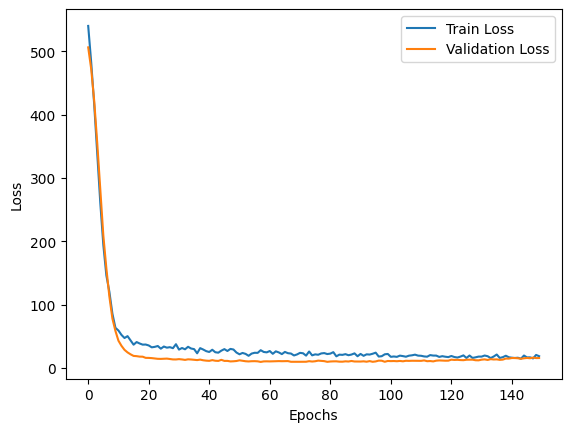

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [13]:
def predict_price(*features):
    input_data = np.array(features).reshape(1, -1)
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return float(prediction[0][0])

# Создание интерфейса Gradio
inputs = [gr.Number(label=f'Feature {i+1}') for i in range(X_train.shape[1])]
output = gr.Textbox(label="Predicted Price")
interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="Boston Housing Price Prediction")


#### 2. Проверка обученной модели пользовательскими данными

In [14]:
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3716f1e84e127bbc78.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [18]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [53]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("sohampatel26/animal-detection-dataset-cats-dogs-and-pandas")

print("Path to dataset files:", dataset_path)

Path to dataset files: /root/.cache/kagglehub/datasets/sohampatel26/animal-detection-dataset-cats-dogs-and-pandas/versions/1


### 3. Указываем путь к набору данных:

### 4. Загружаем набор данных и формируем общую выборку:

In [78]:
imagePaths = list(paths.list_images(dataset_path))
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]  # Имя папки = класс животного
    image = cv2.imread(imagePath)
    if image is None:
        print(f"Ошибка загрузки: {imagePath}")
        continue
    image = cv2.resize(image, (32, 32))  # Изменяем размер на 32x32
    data.append(image)
    labels.append(label)

In [97]:
print("Количество классов:", len(lb.classes_))

Количество классов: 4


#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [55]:
data = np.array(data, dtype="float32") / 255.0  # Нормализация
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [57]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.25, random_state=42)


In [79]:
X_train = X_train.reshape((X_train.shape[0], 32*32*3))
X_val = X_val.reshape((X_val.shape[0], 32*32*3))

Форма X_train: (2252, 3072)
Форма X_val: (751, 3072)


### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [83]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [80]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(32*32*3,)),  # Входной слой
    Dropout(0.5),  # Регуляризация
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(lb.classes_), activation='softmax')  # Выходной слой (кол-во классов)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [60]:
LEARNING_RATE = 0.001  # Скорость обучения
EPOCHS = 20            # Количество эпох
BATCH_SIZE = 32

#### 5.3. Компилируем модель:

In [81]:
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [62]:
# Колбэк для сохранения лучшей модели (по валидационной точности)
checkpoint = ModelCheckpoint("best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="max",
                             verbose=1)

# Колбэк для остановки обучения, если модель перестала улучшаться
early_stopping = EarlyStopping(monitor="val_loss",
                               patience=5,  # Количество эпох без улучшения перед остановкой
                               restore_best_weights=True,
                               verbose=1)

#### 6.2. Запустим процесс обучения модели:

In [82]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Валидация на 25% данных
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks = [checkpoint, early_stopping],  # Используем колбэки (сохранение модели + ранняя остановка)
    verbose=1
)

Epoch 1/20
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3471 - loss: 1.5402
Epoch 1: val_accuracy improved from -inf to 0.51132, saving model to best_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3480 - loss: 1.5347 - val_accuracy: 0.5113 - val_loss: 0.9929
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4546 - loss: 1.0622
Epoch 2: val_accuracy improved from 0.51132 to 0.57124, saving model to best_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4549 - loss: 1.0615 - val_accuracy: 0.5712 - val_loss: 0.9081
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5050 - loss: 0.9701
Epoch 3: val_accuracy did not improve from 0.57124
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5049 - loss: 0.9700 - val_accuracy: 0.5659 - val_loss: 0.8974
Epoch 4/20
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5370 - loss: 0.9293
Epoch 4: val_accuracy did not improve from 0.57124
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5367 - loss: 0.9295 - val_accuracy: 0.5246 - val_loss: 0.9045
Epoch 5/20
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5282 - loss: 0.9180
Epoch 5: val_accuracy did not improve from 0.57124
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5285 - loss: 0.9184 - val_accuracy: 0.5326 - val_loss: 0.8891
Epoch 6/20
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5298 - loss: 0.9053
Epoch 6: val_accuracy did not improve from 

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5312 - loss: 0.8850 - val_accuracy: 0.5766 - val_loss: 0.8653
Epoch 9/20
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5331 - loss: 0.8913
Epoch 9: val_accuracy did not improve from 0.57656
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5331 - loss: 0.8909 - val_accuracy: 0.5446 - val_loss: 0.8625
Epoch 10/20
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5645 - loss: 0.8626
Epoch 10: val_accuracy improved from 0.57656 to 0.59387, saving model to best_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5642 - loss: 0.8627 - val_accuracy: 0.5939 - val_loss: 0.8451
Epoch 11/20
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5282 - loss: 0.8694
Epoch 11: val_accuracy did not improve from 0.59387
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5283 - loss: 0.8695 - val_accuracy: 0.5406 - val_loss: 0.8511
Epoch 12/20
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5533 - loss: 0.8831
Epoch 12: val_accuracy did not improve from 0.59387
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5529 - loss: 0.8826 - val_accuracy: 0.5779 - val_loss: 0.8351
Epoch 13/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5673 - loss: 0.8451
Epoch 13: val_accuracy did not improve from 0.59387
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5672 - loss: 0.8451 - val_accuracy: 0.5872 - val_loss: 0.8314
Epoch 14/20
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5503 - loss: 0.8358
Epoch 14: val_accuracy did not impro

#### 6.3. Загружаем лучшую модель:

In [85]:
best_model = load_model("best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [95]:
predictions = model.predict(testX, batch_size=1000)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [103]:
from sklearn.metrics import classification_report
import numpy as np

# Получаем предсказания от загруженной модели
predictions = model.predict(testX, batch_size=1000)

# Извлекаем классы из testY и predictions
y_true = testY.argmax(axis=1)  # Истинные метки
y_pred = predictions.argmax(axis=1)  # Предсказанные метки

# Проверяем уникальные значения в метках
unique_true_classes = np.unique(y_true)
unique_pred_classes = np.unique(y_pred)

print("Уникальные классы в testY:", unique_true_classes)
print("Уникальные классы в predictions:", unique_pred_classes)

# Генерируем целевые названия, соответствующие уникальным классам
target_names = [str(c) for c in unique_true_classes]  # Названия классов в тестовых данных

# Выводим отчет о классификации
print(classification_report(y_true, y_pred, target_names=target_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Уникальные классы в testY: [0 1 3]
Уникальные классы в predictions: [0 1 3]
              precision    recall  f1-score   support

           0       0.56      0.44      0.49       240
           1       0.49      0.58      0.53       258
           3       0.73      0.74      0.73       253

    accuracy                           0.59       751
   macro avg       0.59      0.58      0.58       751
weighted avg       0.59      0.59      0.59       751



In [104]:
print("Размерность testY:", testY.shape)
print("Форма predictions:", predictions.shape)
print("Количество классов в lb.classes_:", len(lb.classes_))
print("Классы в lb.classes_:", lb.classes_)


Размерность testY: (751, 4)
Форма predictions: (751, 4)
Количество классов в lb.classes_: 4
Классы в lb.classes_: [0 1 2 3]


#### 7.2. Выведем матрицу ошибок

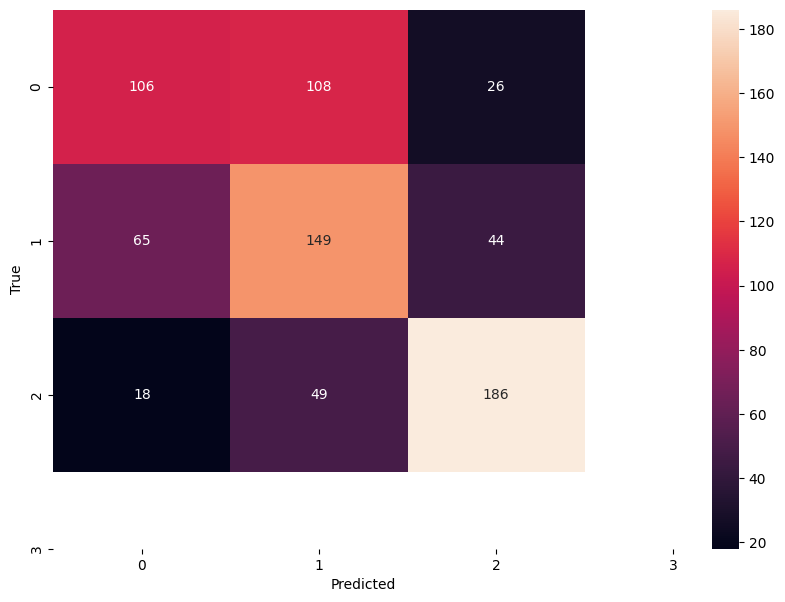

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

7.3. Отобразим график обучения

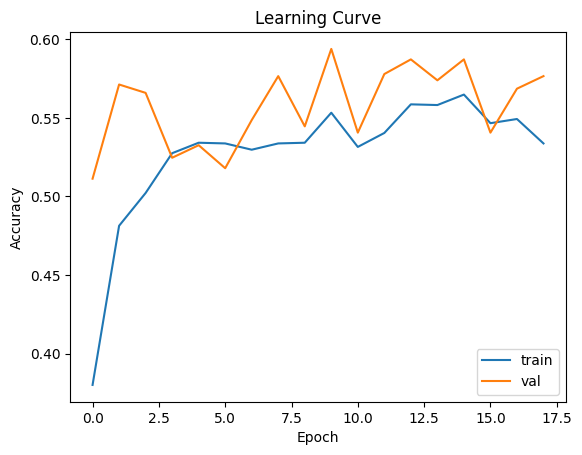

In [106]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 8. Сохранение модели и меток классов:

In [107]:
model.save("trained_model.keras")
with open("label_bin.pickle", "wb") as f:
    pickle.dump(lb, f)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [108]:
import cv2
import numpy as np
import pickle
from tensorflow.keras.models import load_model

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [109]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32)).flatten()
    image = image.astype("float") / 255.0
    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [110]:
def predict_image(image_path, model, lb):
    image = preprocess_image(image_path)
    image = image.reshape(1, -1)
    prediction = model.predict(image)
    class_idx = np.argmax(prediction)
    class_label = lb.classes_[class_idx]
    return class_label

### 10. Визуализируем интерфейс и произведем классификацию:

In [111]:
!pip install gradio
import gradio as gr

model = load_model("trained_model.keras")
with open("label_bin.pickle", "rb") as f:
    lb = pickle.load(f)

def classify_image(image):
    image = cv2.resize(image, (32, 32)).flatten()
    image = image.astype("float") / 255.0
    image = image.reshape(1, -1)
    prediction = model.predict(image)
    class_idx = np.argmax(prediction)
    class_label = lb.classes_[class_idx]
    return class_label

iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs='text',
    title='Image Classifier: Cats, Dogs, Pandas'
)

iface.launch()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7b454c7e489f4f3a2d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
